In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
method_files = {
    'autoencoder': './demap_eval/table1_ae.csv',
    'GAGA': './demap_eval/table1_no_exp.csv',
}
dfs = {method: pd.read_csv(file) for method, file in method_files.items()}

# concatenate the dataframes and add a column for the name of the method
df = pd.concat([df.assign(name=method) for method, df in dfs.items()])
df
    

,method,seed,bcv,dropout,demap,accuracy,DRS,DGCS,demap_phate,dimensions.latent,name
0,paths,5,0.00,0.5,0.455838,0.021839,0.757814,0.039192,0.550738,10,autoencoder
1,paths,5,0.50,0.5,0.167541,0.113032,0.383699,0.059009,0.176284,10,autoencoder
2,paths,5,0.18,0.5,0.451347,0.084968,0.645289,0.063821,0.527289,10,autoencoder
3,paths,5,0.25,0.5,0.329469,0.137180,0.569894,0.053421,0.509703,10,autoencoder
4,groups,5,0.00,0.5,0.272502,0.008760,0.802837,0.038344,0.745041,10,autoencoder
...,...,...,...,...,...,...,...,...,...,...,...
35,groups,1,0.50,0.5,0.024484,0.704978,0.369697,0.218822,0.043794,10,GAGA
36,paths,1,0.18,0.5,0.657415,0.177462,0.669494,0.038038,0.673854,10,GAGA
37,groups,1,0.00,0.5,0.723782,0.019901,0.860107,0.042415,0.704745,10,GAGA
38,groups,1,0.25,0.5,0.646966,0.164388,0.671386,0.053365,0.662568,10,GAGA


In [5]:
df[(df['name'] == 'autoencoder') & (df['method'] == 'groups') & (df['bcv'] == 0.00)]

,method,seed,bcv,dropout,demap,accuracy,DRS,DGCS,demap_phate,dimensions.latent,name
4,groups,5,0.0,0.5,0.272502,0.008760,0.802837,0.038344,0.745041,10,autoencoder
13,groups,4,0.0,0.5,0.253778,0.026595,0.786904,0.032997,0.722612,10,autoencoder
20,groups,3,0.0,0.5,0.515829,0.076326,0.731410,0.042283,0.836114,10,autoencoder
25,groups,2,0.0,0.5,0.244288,0.005469,0.882245,0.029675,0.597448,10,autoencoder
36,groups,1,0.0,0.5,0.328916,0.048010,0.747672,0.045112,0.704745,10,autoencoder


In [6]:
# Add rows for PHATE from demap_phate column
phate_rows = []
for i, row in df.iterrows():
    if row['name'] == 'GAGA':
        phate_row = row.copy()
        phate_row['name'] = 'PHATE'
        phate_row['demap'] = row['demap_phate']
        phate_rows.append(pd.DataFrame([phate_row]))

phate_df = pd.concat(phate_rows, ignore_index=True)

total_df = pd.concat([df, phate_df], ignore_index=True)


In [7]:
total_df

,method,seed,bcv,dropout,demap,accuracy,DRS,DGCS,demap_phate,dimensions.latent,name
0,paths,5,0.00,0.5,0.455838,0.021839,0.757814,0.039192,0.550738,10,autoencoder
1,paths,5,0.50,0.5,0.167541,0.113032,0.383699,0.059009,0.176284,10,autoencoder
2,paths,5,0.18,0.5,0.451347,0.084968,0.645289,0.063821,0.527289,10,autoencoder
3,paths,5,0.25,0.5,0.329469,0.137180,0.569894,0.053421,0.509703,10,autoencoder
4,groups,5,0.00,0.5,0.272502,0.008760,0.802837,0.038344,0.745041,10,autoencoder
...,...,...,...,...,...,...,...,...,...,...,...
115,groups,1,0.50,0.5,0.043794,0.704978,0.369697,0.218822,0.043794,10,PHATE
116,paths,1,0.18,0.5,0.673854,0.177462,0.669494,0.038038,0.673854,10,PHATE
117,groups,1,0.00,0.5,0.704745,0.019901,0.860107,0.042415,0.704745,10,PHATE
118,groups,1,0.25,0.5,0.662568,0.164388,0.671386,0.053365,0.662568,10,PHATE


In [9]:
# group by method, name, bcv, compute mean and std of demap, DRS, and DGCS
grouped = total_df.groupby(['name', 'method', 'bcv']).agg({'demap': ['mean', 'std'], 'DRS': ['mean', 'std'], 'DGCS': ['mean', 'std']})
grouped

demap                 DRS                DGCS  \
                             mean       std      mean       std      mean   
name        method bcv                                                      
GAGA        groups 0.00  0.734917  0.067614  0.810860  0.068390  0.047061   
                   0.18  0.762290  0.038250  0.757334  0.042287  0.055643   
                   0.25  0.707463  0.068180  0.693012  0.048780  0.058805   
                   0.50  0.374385  0.217617  0.409089  0.044092  0.129213   
            paths  0.00  0.672423  0.122632  0.693960  0.022925  0.050354   
                   0.18  0.639609  0.108407  0.635738  0.056878  0.057357   
                   0.25  0.618520  0.106235  0.562861  0.079796  0.068504   
                   0.50  0.308003  0.167352  0.346544  0.034688  0.163403   
PHATE       groups 0.00  0.721192  0.085675  0.810860  0.068390  0.047061   
                   0.18  0.746092  0.066248  0.757334  0.042287  0.055643   
                   0.25  0.717279  0.075413  0.693012  0.048780  0.058805   
                   0.50  0.387268  0.205113  0.409089  0.044092  0.129213   
            paths  0.00  0.682458  0.117360  0.693960  0.022925  0.050354   
                   0.18  0.660346  0.111327  0.635738  0.056878  0.057357   
                   0.25  0.632303  0.128300  0.562861  0.079796  0.068504   
                   0.50  0.311116  0.154934  0.346544  0.034688  0.163403   
autoencoder groups 0.00  0.323063  0.112645  0.790213  0.058965  0.037682   
                   0.18  0.430980  0.102699  0.679100  0.034086  0.056209   
                   0.25  0.377873  0.114741  0.645223  0.032406  0.059136   
                   0.50  0.256302  0.087567  0.456692  0.040504  0.057978   
            paths  0.00  0.516792  0.071892  0.746849  0.088116  0.047541   
                   0.18  0.506779  0.082566  0.634465  0.102865  0.071307   
                   0.25  0.441236  0.128679  0.561047  0.097315  0.067383   
                   0.50  0.269501  0.095465  0.409257  0.042078  0.059205   

                                   
                              std  
name        method bcv             
GAGA        groups 0.00  0.019542  
                   0.18  0.015065  
                   0.25  0.014110  
                   0.50  0.051772  
            paths  0.00  0.006812  
                   0.18  0.018901  
                   0.25  0.030957  
                   0.50  0.043733  
PHATE       groups 0.00  0.019542  
                   0.18  0.015065  
                   0.25  0.014110  
                   0.50  0.051772  
            paths  0.00  0.006812  
                   0.18  0.018901  
                   0.25  0.030957  
                   0.50  0.043733  
autoencoder groups 0.00  0.006381  
                   0.18  0.009100  
                   0.25  0.015271  
                   0.50  0.015473  
            paths  0.00  0.031654  
                   0.18  0.028828  
                   0.25  0.020653  
                   0.50  0.008258

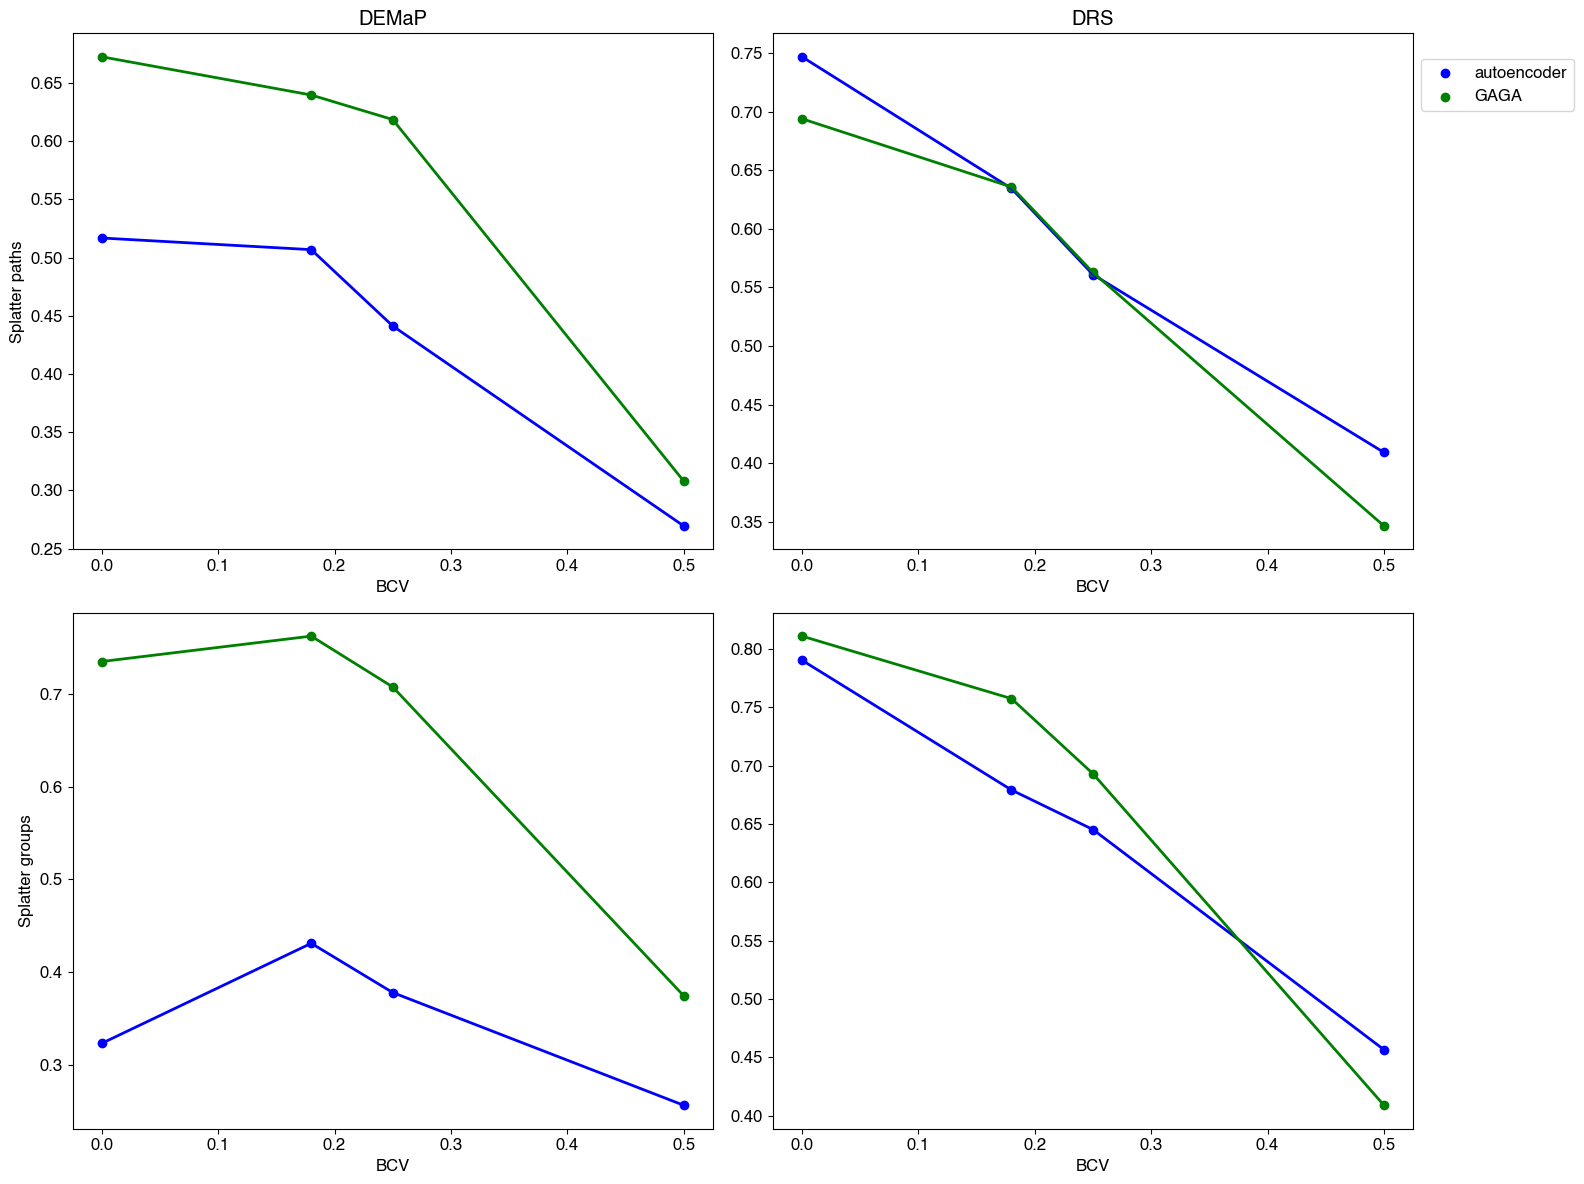

In [10]:
# each col is a metric, each row is a method

# x is bcv, y is metric mean, error bars are std
# each name is a different color
# font Helvetica
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

row_num = total_df['method'].nunique()
col_num = 2
colors = ['blue', 'green']
# linestyles = ['-', '--', '-.']

fig, ax = plt.subplots(row_num, col_num, figsize=(row_num * 8, col_num * 6))
# label method on the left
for i in range(0, row_num):
    ax[i, 0].set_ylabel(f"Splatter {total_df['method'].unique()[i]}")
# label metric on the top
for j in range(0, col_num):
    ax[0, j].set_title(['DEMaP', 'DRS'][j])
# share x axis for same column
for i in range(0, row_num):
    for j in range(0, col_num):
        ax[i, j].set_xlabel('BCV')
for i in range(0, row_num):
    method = total_df['method'].unique()[i]
    for j in range(0, col_num):
        metric = ['demap', 'DRS'][j]

        for k, name in enumerate(total_df['name'].unique()):
            if name == 'PHATE':
                continue
            
            metric_data = total_df[(total_df['name'] == name) & (total_df['method'] == method)]
            # print(name, metric)
            this_line = {
                'x': [], 'y': [], 'yerr': []
            }

            for b in np.sort(metric_data['bcv'].unique()):
                mean = metric_data[metric_data['bcv'] == b][metric].mean()
                std = metric_data[metric_data['bcv'] == b][metric].std()
                # print(b, mean, std)
                this_line['x'].append(b)
                this_line['y'].append(mean)
                this_line['yerr'].append(std)
            
            ax[i,j].scatter(this_line['x'], this_line['y'], label=name, color=colors[k])
            ax[i,j].plot(this_line['x'], this_line['y'], color=colors[k], linewidth=2)
            # ax[i,j].fill_between(this_line['x'], 
            #                       np.array(this_line['y']) - np.array(this_line['yerr']),
            #                         np.array(this_line['y']) + np.array(this_line['yerr']), alpha=0.1, color=colors[k])
            # ax[i,j].legend()
        
    # show shared legend and outside of the plot
    ax[0,-1].legend(loc='center left', bbox_to_anchor=(1, 0.90))

# save to pdf
plt.tight_layout()
plt.savefig('splatter.pdf')


autoencoder groups (20, 11)
autoencoder demap (20, 11)
groups autoencoder demap [0.0, 0.18, 0.25, 0.5] [0.3230625194967684, 0.4309797396389257, 0.37787348185116665, 0.25630244776751276]
GAGA groups (20, 11)
GAGA demap (20, 11)
groups GAGA demap [0.0, 0.18, 0.25, 0.5] [0.7349168346789497, 0.7622901106303637, 0.707463108426039, 0.3743854294283425]
autoencoder paths (20, 11)
autoencoder demap (20, 11)
paths autoencoder demap [0.0, 0.18, 0.25, 0.5] [0.5167922228782382, 0.5067794289781933, 0.44123554605032805, 0.26950124043098783]
GAGA paths (20, 11)
GAGA demap (20, 11)
paths GAGA demap [0.0, 0.18, 0.25, 0.5] [0.6724234915707891, 0.6396087857052475, 0.6185202339081851, 0.3080030763012561]
autoencoder groups (20, 11)
autoencoder DRS (20, 11)
groups autoencoder DRS [0.0, 0.18, 0.25, 0.5] [0.7902134474842517, 0.6790996322726484, 0.6452230402973077, 0.456692102512846]
GAGA groups (20, 11)
GAGA DRS (20, 11)
groups GAGA DRS [0.0, 0.18, 0.25, 0.5] [0.8108596343965406, 0.7573339670275601, 0.6930121

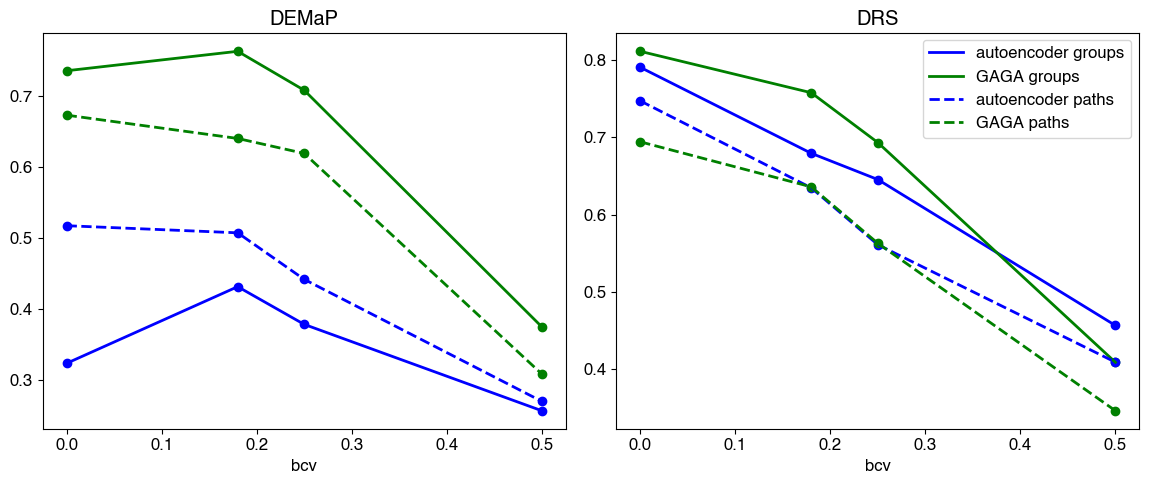

In [11]:
# Style 2: each method (group, path) has different line style, plot on the same plot
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 12

row_num = 1
col_num = 2
colors = ['blue', 'green']
# linestyles = ['-', '--', '-.']

fig, ax = plt.subplots(row_num, col_num, figsize=(col_num * 6, row_num * 5))

# label metric on the top
for j in range(0, col_num):
    ax[j].set_title(['DEMaP', 'DRS'][j])
# share x axis for same column
for i in range(0, row_num):
    for j in range(0, col_num):
        ax[j].set_xlabel('bcv')

for i in range(0, row_num):
    for j in range(0, col_num):
        for method in ['groups', 'paths']:
            metric = ['demap', 'DRS'][j]

            for k, name in enumerate(total_df['name'].unique()):
                if name == 'PHATE':
                    continue
                
                print(name, method, metric_data.shape)
                metric_data = total_df[(total_df['name'] == name) & (total_df['method'] == method)]
                print(name, metric, metric_data.shape)
                this_line = {
                    'x': [], 'y': [], 'yerr': []
                }

                for b in np.sort(metric_data['bcv'].unique()):
                    mean = metric_data[metric_data['bcv'] == b][metric].mean()
                    std = metric_data[metric_data['bcv'] == b][metric].std()
                    # print(b, mean, std)
                    this_line['x'].append(b)
                    this_line['y'].append(mean)
                    this_line['yerr'].append(std)
                print(method, name, metric, this_line['x'], this_line['y'])

                if method == 'groups':
                    linestyle = '-'
                else:
                    linestyle = '--'
                # set y limit
                #ax[j].set_ylim(0, 1)
                ax[j].scatter(this_line['x'], this_line['y'], color=colors[k])
                ax[j].plot(this_line['x'], this_line['y'], label=f'{name} {method}',
                           color=colors[k], linewidth=2, linestyle=linestyle)
                # errorbar
                #ax[j].errorbar(this_line['x'], this_line['y'], yerr=this_line['yerr'], fmt='o', color=colors[k])
                # ax[j].fill_between(this_line['x'], 
                #                       np.array(this_line['y']) - np.array(this_line['yerr']),
                #                         np.array(this_line['y']) + np.array(this_line['yerr']), alpha=0.1, color=colors[k])
                # ax[i,j].legend()
        
    # show shared legend and outside of the plot
    ax[-1].legend(loc='center left', bbox_to_anchor=(0.57, 0.86))

# save to pdf
plt.tight_layout()
plt.savefig('splatter_merged.pdf')

In [ ]:
# table with rows as method, columns as metric, values as mean and std
total_df.groupby(['name', 'method']).agg({'demap': ['mean', 'std'], 'DRS': ['mean', 'std'], 'DGCS': ['mean', 'std']})

demap                 DRS                DGCS          
                        mean       std      mean       std      mean       std
name        method                                                            
GAGA        groups  0.644764  0.195615  0.667574  0.165974  0.072681  0.043304
            paths   0.559639  0.191098  0.559776  0.143562  0.084905  0.053811
PHATE       groups  0.642958  0.188657  0.667574  0.165974  0.072681  0.043304
            paths   0.571556  0.195346  0.559776  0.143562  0.084905  0.053811
autoencoder groups  0.347055  0.117047  0.642807  0.129324  0.052751  0.014364
            paths   0.433577  0.135130  0.587904  0.148445  0.061359  0.024023